# 第6章 决策树

1．分类决策树模型是表示基于特征对实例进行分类的树形结构。决策树可以转换成一个**if-then**规则的集合，也可以看作是定义在特征空间划分上的类的条件概率分布。

2．决策树学习旨在构建一个与训练数据拟合很好，并且复杂度小的决策树。因为从可能的决策树中直接选取最优决策树是NP完全问题。现实中采用启发式方法学习次优的决策树。

决策树学习算法包括3部分：特征选择、树的生成和树的剪枝。常用的算法有ID3、
C4.5和CART。

3．特征选择的目的在于选取对训练数据能够分类的特征。特征选择的关键是其准则。常用的准则如下：

（1）样本集合$D$对特征$A$的信息增益（ID3）


$$g(D, A)=H(D)-H(D|A)$$

$$H(D)=-\sum_{k=1}^{K} \frac{\left|C_{k}\right|}{|D|} \log _{2} \frac{\left|C_{k}\right|}{|D|}$$

$$H(D | A)=\sum_{i=1}^{n} \frac{\left|D_{i}\right|}{|D|} H\left(D_{i}\right)$$

其中，$H(D)$是数据集$D$的熵，$H(D_i)$是数据集$D_i$的熵，$H(D|A)$是数据集$D$对特征$A$的条件熵。	$D_i$是$D$中特征$A$取第$i$个值的样本子集，$C_k$是$D$中属于第$k$类的样本子集。$n$是特征$A$取 值的个数，$K$是类的个数。

（2）样本集合$D$对特征$A$的信息增益比（C4.5）


$$g_{R}(D, A)=\frac{g(D, A)}{H(D)}$$


其中，$g(D,A)$是信息增益，$H(D)$是数据集$D$的熵。

（3）样本集合$D$的基尼指数（CART）

$$\operatorname{Gini}(D)=1-\sum_{k=1}^{K}\left(\frac{\left|C_{k}\right|}{|D|}\right)^{2}$$

特征$A$条件下集合$D$的基尼指数：

 $$\operatorname{Gini}(D, A)=\frac{\left|D_{1}\right|}{|D|} \operatorname{Gini}\left(D_{1}\right)+\frac{\left|D_{2}\right|}{|D|} \operatorname{Gini}\left(D_{2}\right)$$
 
4．决策树的生成。通常使用信息增益最大、信息增益比最大或基尼指数最小作为特征选择的准则。决策树的生成往往通过计算信息增益或其他指标，从根结点开始，递归地产生决策树。这相当于用信息增益或其他准则不断地选取局部最优的特征，或将训练集分割为能够基本正确分类的子集。

5．决策树的剪枝。由于生成的决策树存在过拟合问题，需要对它进行剪枝，以简化学到的决策树。决策树的剪枝，往往从已生成的树上剪掉一些叶结点或叶结点以上的子树，并将其父结点或根结点作为新的叶结点，从而简化生成的决策树。


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from math import log

---
### 1、课件上数据集

In [41]:
# 书上题目5.1
def create_data():
    datasets = [['自由职业', 28, '男', 5000, '高中', '是'],
               ['工人', 36, '女', 5500, '高中', '否'],
               ['工人', 42, '男', 2800, '初中', '是'],
               ['白领', 45, '女', 3300, '小学', '是'],
               ['白领', 25, '男', 10000, '初中', '是'],
               ['白领', 32, '女', 8000, '硕士', '是'],
               ['白领', 28, '女', 13000, '硕士', '是'],
               ['自由职业', 21, '男', 4000, '本科', '否'],
               ['自由职业', 22, '女', 3200, '初中', '否'],
               ['工人', 33, '男', 3000, '高中', '否'],
               ['工人', 48, '女', 4200, '初中', '否']
               ]
    column_name = [u'职业', u'年龄', u'性别', u'收入', u'学历', u'是否贷款']
    # 返回数据集和每个维度的名称
    return datasets, column_name

In [42]:
pdata, column_name = create_data()

In [43]:
pdata = pd.DataFrame(pdata, columns=column_name)

In [44]:
pdata

,职业,年龄,性别,收入,学历,是否贷款
0,自由职业,28,男,5000,高中,是
1,工人,36,女,5500,高中,否
2,工人,42,男,2800,初中,是
3,白领,45,女,3300,小学,是
4,白领,25,男,10000,初中,是
5,白领,32,女,8000,硕士,是
6,白领,28,女,13000,硕士,是
7,自由职业,21,男,4000,本科,否
8,自由职业,22,女,3200,初中,否
9,工人,33,男,3000,高中,否


In [52]:
datasets = pdata.copy()
datasets['收入'] = datasets['收入'].apply(lambda x : '>=5000' if x >= 5000 else '<5000')
datasets

,职业,年龄,性别,收入,学历,是否贷款
0,自由职业,28,男,>=5000,高中,是
1,工人,36,女,>=5000,高中,否
2,工人,42,男,<5000,初中,是
3,白领,45,女,<5000,小学,是
4,白领,25,男,>=5000,初中,是
5,白领,32,女,>=5000,硕士,是
6,白领,28,女,>=5000,硕士,是
7,自由职业,21,男,<5000,本科,否
8,自由职业,22,女,<5000,初中,否
9,工人,33,男,<5000,高中,否


---
### 2、特征选择

In [99]:
# 计算信息熵
def calc_ent(datasets):
    data_length = len(datasets)
    label_count = {}
    # 遍历每一个样本，累计每一类样本的个数。
    for i in range(data_length):
        label = datasets[i][-1]
        if label not in label_count:
            label_count[label] = 0
        label_count[label] += 1
    # 对于每一类标签，计算p*log(p)
    ent = -sum([(p / data_length) * log(p / data_length, 2)
                for p in label_count.values()])
    return ent

# 计算条件熵
def cond_ent(datasets, feat_idx=0):
    data_length = len(datasets)
    feature_sets = {}
    # 分配特征每个值的标签的分布。
    for i in range(data_length):
        feature = datasets[i][feat_idx]
        if feature not in feature_sets:
            feature_sets[feature] = []
        feature_sets[feature].append(datasets[i])
    # 计算条件熵：对于特征每个值，求熵，再求和
    cond_ent = sum(
        [(len(p) / data_length) * calc_ent(p) for p in feature_sets.values()])
    return cond_ent

# 计算信息增益
def info_gain(ent, cond_ent):
    return ent - cond_ent


def info_gain_train(datasets, columns):
    count = len(datasets[0]) - 1
    ent = calc_ent(datasets)
    info_gain_li = []
    for c in range(count):
        c_info_gain = info_gain(ent, cond_ent(datasets, feat_idx=c))
        info_gain_li.append((c, c_info_gain))
        print('特征({}) - info_gain - {:.3f}'.format(columns[c], c_info_gain))
    # 选择信息增益最大的特征
    best_ = max(info_gain_li, key=lambda x: x[-1])
    return '特征({})的信息增益最大，选择做为根节点决策特征'.format(columns[best_[0]])

In [100]:
columns = ['性别','收入','是否贷款']
min_datasets = datasets.loc[:,columns]
info_gain_train(np.array(min_datasets),columns)

特征(性别) - info_gain - 0.007
特征(收入) - info_gain - 0.165


'特征(收入)的信息增益最大，选择做为根节点决策特征'

In [101]:
data_split1 = min_datasets.iloc[[2, 3, 7, 8, 9, 10]]
data_split2 = min_datasets.iloc[[0, 1, 4, 5, 6]]
print(data_split1)
print("-"*30)
print(data_split2)

   性别     收入 是否贷款
2   男  <5000    是
3   女  <5000    是
7   男  <5000    否
8   女  <5000    否
9   男  <5000    否
10  女  <5000    否
------------------------------
  性别      收入 是否贷款
0  男  >=5000    是
1  女  >=5000    否
4  男  >=5000    是
5  女  >=5000    是
6  女  >=5000    是


In [102]:
info_gain_train(np.array(data_split1),columns)

特征(性别) - info_gain - 0.000
特征(收入) - info_gain - 0.000


'特征(性别)的信息增益最大，选择做为根节点决策特征'

In [103]:
info_gain_train(np.array(data_split2),columns)
np.log(2)

特征(性别) - info_gain - 0.171
特征(收入) - info_gain - 0.000


0.6931471805599453

---

### 3、生成决策树

In [59]:
# 定义节点类 二叉树
class Node:
    def __init__(self, root=True, label=None, feature_name=None, feature=None):
        self.root = root
        self.label = label
        self.feature_name = feature_name
        self.feature = feature
        self.tree = {}
        self.result = {
            'label:': self.label,
            'feature': self.feature,
            'tree': self.tree
        }

    def __repr__(self):
        return '{}'.format(self.result)

    def add_node(self, val, node):
        self.tree[val] = node

    def predict(self, features):
        if self.root is True:
            return self.label
        return self.tree[features[self.feature]].predict(features)


class DTree:
    def __init__(self, epsilon=0):
        self.epsilon = epsilon
        self._tree = {}

    # 熵
    @staticmethod
    def calc_ent(datasets):
        data_length = len(datasets)
        label_count = {}
        for i in range(data_length):
            label = datasets[i][-1]
            if label not in label_count:
                label_count[label] = 0
            label_count[label] += 1
        ent = -sum([(p / data_length) * log(p / data_length, 2)
                    for p in label_count.values()])
        return ent

    # 经验条件熵
    def cond_ent(self, datasets, axis=0):
        data_length = len(datasets)
        feature_sets = {}
        for i in range(data_length):
            feature = datasets[i][axis]
            if feature not in feature_sets:
                feature_sets[feature] = []
            feature_sets[feature].append(datasets[i])
        cond_ent = sum([(len(p) / data_length) * self.calc_ent(p)
                        for p in feature_sets.values()])
        return cond_ent

    # 信息增益
    @staticmethod
    def info_gain(ent, cond_ent):
        return ent - cond_ent

    def info_gain_train(self, datasets):
        count = len(datasets[0]) - 1
        ent = self.calc_ent(datasets)
        best_feature = []
        for c in range(count):
            c_info_gain = self.info_gain(ent, self.cond_ent(datasets, axis=c))
            best_feature.append((c, c_info_gain))
        # 比较大小
        best_ = max(best_feature, key=lambda x: x[-1])
        return best_

    def train(self, train_data):
        """
        input:数据集D(DataFrame格式)，特征集A，阈值eta
        output:决策树T
        """
        _, y_train, features = train_data.iloc[:, :-1], train_data.iloc[:,-1], train_data.columns[:-1]
        # 1,若D中实例属于同一类Ck，则T为单节点树，并将类Ck作为结点的类标记，返回T
        if len(y_train.value_counts()) == 1:
            return Node(root=True, label=y_train.iloc[0])

        # 2, 若A为空，则T为单节点树，将D中实例树最大的类Ck作为该节点的类标记，返回T
        if len(features) == 0:
            return Node(
                root=True,
                label=y_train.value_counts().sort_values(
                    ascending=False).index[0])

        # 3,计算最大信息增益 同5.1,Ag为信息增益最大的特征
        max_feature, max_info_gain = self.info_gain_train(np.array(train_data))
        max_feature_name = features[max_feature]

        # 4,Ag的信息增益小于阈值eta,则置T为单节点树，并将D中是实例数最大的类Ck作为该节点的类标记，返回T
        if max_info_gain < self.epsilon:
            return Node(
                root=True,
                label=y_train.value_counts().sort_values(
                    ascending=False).index[0])

        # 5,构建Ag子集
        node_tree = Node(
            root=False, feature_name=max_feature_name, feature=max_feature)

        feature_list = train_data[max_feature_name].value_counts().index
        for f in feature_list:
            sub_train_df = train_data.loc[train_data[max_feature_name] ==
                                          f].drop([max_feature_name], axis=1)

            # 6, 递归生成树
            sub_tree = self.train(sub_train_df)
            node_tree.add_node(f, sub_tree)

        return node_tree

    def fit(self, train_data):
        self._tree = self.train(train_data)
        return self._tree

    def predict(self, X_test):
        return self._tree.predict(X_test)

In [64]:
dt = DTree()
tree = dt.fit(datasets.loc[:,['性别','收入','是否贷款']])
tree.result

{'feature': 1,
 'label:': None,
 'tree': {'<5000': {'label:': None, 'feature': 0, 'tree': {'女': {'label:': '否', 'feature': None, 'tree': {}}, '男': {'label:': '否', 'feature': None, 'tree': {}}}},
  '>=5000': {'label:': None, 'feature': 0, 'tree': {'女': {'label:': '是', 'feature': None, 'tree': {}}, '男': {'label:': '是', 'feature': None, 'tree': {}}}}}}

In [65]:
dt.predict(['女', '<5000', '硕士'])

'否'

In [67]:
dt.predict(['女', '>=5000', '硕士'])

'是'

#### 3.1 连续型数据

In [110]:
datasets_test = pdata.copy()
datasets_test['收入'] = datasets_test['收入'].apply(lambda x : '>=10000' if x >= 10000 else '<10000')
columns = ['性别','收入','是否贷款']
datasets_test = datasets_test.loc[:,columns]
info_gain_train(np.array(datasets_test),columns)

特征(性别) - info_gain - 0.007
特征(收入) - info_gain - 0.183


'特征(收入)的信息增益最大，选择做为根节点决策特征'

#### 3.2 如何选择分裂的属性

In [111]:
#信息增益倾向于选择分裂点多的属性，容易导致过拟合
datasets_test = pdata.copy()
datasets_test['收入'] = datasets_test['收入'].apply(lambda x : '>=10000' if x >= 10000 else '<10000')
columns = ['职业','年龄','性别','收入','是否贷款']
datasets_test = datasets_test.loc[:,columns]
info_gain_train(np.array(datasets_test),columns)

特征(职业) - info_gain - 0.449
特征(年龄) - info_gain - 0.994
特征(性别) - info_gain - 0.007
特征(收入) - info_gain - 0.183


'特征(年龄)的信息增益最大，选择做为根节点决策特征'

#### 计算信息增益率

信息增益比 = 惩罚参数 * 信息增益

其中的$H_A(D)$，对于样本集合D，将当前特征A作为随机变量（取值是特征A的各个特征值），求得的经验熵。

$$H_A(D)=-\sum_{i=1}^{N} \frac{\left|C_{i}\right|}{|D|} \log _{2} \frac{\left|C_{i}\right|}{|D|}$$

信息增益比本质： 是在信息增益的基础之上乘上一个惩罚参数。特征个数较多时，惩罚参数较小；特征个数较少时，惩罚参数较大。

In [134]:
# 计算信息增益率

# 计算信息熵
def calc_ent(datasets):
    data_length = len(datasets)
    label_count = {}
    # 遍历每一个样本，累计每一类样本的个数。
    for i in range(data_length):
        label = datasets[i][-1]
        if label not in label_count:
            label_count[label] = 0
        label_count[label] += 1
    # 对于每一类标签，计算p*log(p)
    ent = -sum([(p / data_length) * log(p / data_length, 2)
                for p in label_count.values()])
    return ent

# 计算条件熵
def cond_ent(datasets, feat_idx=0):
    data_length = len(datasets)
    feature_sets = {}
    # 分配特征每个值的标签的分布。
    for i in range(data_length):
        feature = datasets[i][feat_idx]
        if feature not in feature_sets:
            feature_sets[feature] = []
        feature_sets[feature].append(datasets[i])
    # 计算条件熵：对于特征每个值，求熵，再求和
    cond_ent = sum(
        [(len(p) / data_length) * calc_ent(p) for p in feature_sets.values()])
    return cond_ent

# 计算信息惩罚因子
def calc_penalty(datasets, feat_idx=0):
    data_length = len(datasets)
    feature_sets = {}
    for i in range(data_length):
        feature = datasets[i][feat_idx]
        if feature not in feature_sets:
            feature_sets[feature] = 1
        feature_sets[feature] += 1
    penalty = -1/sum([(p / data_length) * log(p / data_length, 2)
                for p in feature_sets.values()])
    #print(penalty)
    return penalty

# 计算信息增益
def info_gain(ent, cond_ent):
    return ent - cond_ent


def info_gain_ratio_train(datasets, columns):
    count = len(datasets[0]) - 1
    ent = calc_ent(datasets)
    info_gain_li = []
    for c in range(count):
        c_info_gain = info_gain(ent, cond_ent(datasets, feat_idx=c))*calc_penalty(datasets, feat_idx=c)
        info_gain_li.append((c, c_info_gain))
        print('特征({}) - info_gain_ratio - {:.3f}'.format(columns[c], c_info_gain))
    # 选择信息增益最大的特征
    best_ = max(info_gain_li, key=lambda x: x[-1])
    return '特征({})的信息增益率最大，选择做为根节点决策特征'.format(columns[best_[0]])

In [135]:
#信息增益率
datasets_test = pdata.copy()
datasets_test['收入'] = datasets_test['收入'].apply(lambda x : '>=10000' if x >= 10000 else '<10000')
columns = ['职业','年龄','性别','收入','是否贷款']
datasets_test = datasets_test.loc[:,columns]
info_gain_ratio_train(np.array(datasets_test),columns)

特征(职业) - info_gain_ratio - 0.287
特征(年龄) - info_gain_ratio - 0.219
特征(性别) - info_gain_ratio - 0.008
特征(收入) - info_gain_ratio - 0.288


'特征(收入)的信息增益率最大，选择做为根节点决策特征'

#### 3.3 什么时候停止分裂

In [133]:
# 所有特征已经使用完毕
dt = DTree()
tree = dt.fit(datasets.loc[:,['性别','收入','是否贷款']])
tree.result

{'feature': 1,
 'label:': None,
 'tree': {'<5000': {'label:': None, 'feature': 0, 'tree': {'女': {'label:': '否', 'feature': None, 'tree': {}}, '男': {'label:': '否', 'feature': None, 'tree': {}}}},
  '>=5000': {'label:': None, 'feature': 0, 'tree': {'女': {'label:': '是', 'feature': None, 'tree': {}}, '男': {'label:': '是', 'feature': None, 'tree': {}}}}}}

In [132]:
# 熵或者基尼值小于阀值
dt = DTree(epsilon=0.01)
tree = dt.fit(datasets.loc[:,['性别','收入','是否贷款']])
tree.result

{'feature': 1,
 'label:': None,
 'tree': {'<5000': {'label:': '否', 'feature': None, 'tree': {}},
  '>=5000': {'label:': None, 'feature': 0, 'tree': {'女': {'label:': '是', 'feature': None, 'tree': {}}, '男': {'label:': '是', 'feature': None, 'tree': {}}}}}}

## scikit-learn实例：课件例子

In [115]:
X = pdata.loc[:,['性别','收入']]
X['性别'] = X['性别'].apply(lambda x : 1 if x == '男' else 0)
X['收入'] = X['收入'].apply(lambda x : 1 if x >= 5000 else 0)
y = pdata.iloc[:,-1]
y = y.apply(lambda x : 1 if x == '是' else 0)
print(X)
print(y)

    性别  收入
0    1   1
1    0   1
2    1   0
3    0   0
4    1   1
5    0   1
6    0   1
7    1   0
8    0   0
9    1   0
10   0   0
0     1
1     0
2     1
3     1
4     1
5     1
6     1
7     0
8     0
9     0
10    0
Name: 是否贷款, dtype: int64


In [116]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
import graphviz

In [117]:
clf = DecisionTreeClassifier(criterion='entropy')
clf.fit(X, y)
print(clf.feature_importances_)

[0.32017179 0.67982821]


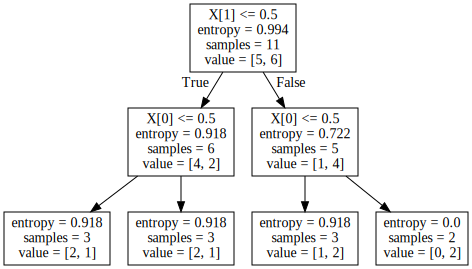

In [118]:
tree_pic = export_graphviz(clf, out_file="mytree.pdf")
with open('mytree.pdf') as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)

## scikit-learn实例：鸢尾花例子

In [21]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
# data
def create_data():
    iris = load_iris()
    df = pd.DataFrame(iris.data, columns=iris.feature_names)
    df['label'] = iris.target
    df.columns = [
        'sepal length', 'sepal width', 'petal length', 'petal width', 'label'
    ]
    data = np.array(df.iloc[:100, [0, 1, -1]])
    # print(data)
    return data[:, :2], data[:, -1]


X, y = create_data()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [22]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
import graphviz

In [33]:
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train,)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [35]:
clf.score(X_test, y_test)

0.9666666666666667

In [36]:
tree_pic = export_graphviz(clf, out_file="mytree.pdf")
with open('mytree.pdf') as f:
    dot_graph = f.read()

[0.56950594 0.43049406]


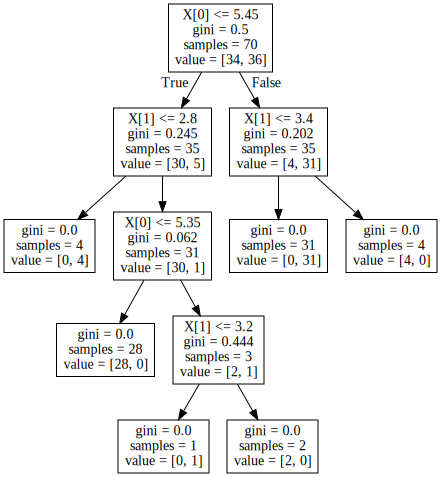

In [37]:
graphviz.Source(dot_graph)